In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None)
df = pd.read_csv('EKG_pupsniu_analize.csv', delimiter=';')

Užduoties tikslas – ištirti pasirinktą duomenų aibę

Darbe reikės atlikti pirminį duomenų apdorojimą: užpildyti praleistus duomenis, išskirti taškus atsiskyrėlius, pritaikyti kelis normavimo metodus, pateikti aprašomąsias duomenų statistikas. Atlikti tiriamos aibės vizualią analizę, naudojant taškines, stačiakampes diagramas, histogramas.

Užduoties ataskaitoje reikia pateikti:
1. Aprašyti užduoties tikslą ir uždavinius.
2. Trumpai aprašyti tiriamą duomenų aibę, kokie požymiai: skaitiniai, ranginiai ir pan.?
3. Pateikti atskirų požymių aprašomąsias statistikas lentelės pavidalu: min, max, 1, 3 kvartilės, vidurkis mediana, dispersija ir pan.
4. Pasirinktais metodais užpildyti praleistas reikšmes, mokėti argumentuoti, kokį metodą taikėte ir kodėl.
5. Nustatyti taškus atsiskyrėlius, pašalinti juos iš duomenų aibės, palyginti, kaip pasikeitė imties statistiniai duomenys.
6. Sunormuoti duomenų aibę naudojant du normavimo metodus: pagal vidurkį ir dispersiją, min - max.
7. Pateikti vizualią duomenų aibės analizę: taškiniai grafikai, dažnio diagramos, histogramos, stačiakampės diagramos.Gautus rezultatus aprašyti, mokėti paaiškinti.

8. Ištirti požymių tarpusavio priklausomybę. Apskaičiuoti požymių koreliacijas, pateikti skaitinius įverčius lentelės ir grafiko pavidalu.
9. Reikia pateikti atliekamos užduoties kodus, mokėti paaiškinti.

 Daugiau informacijos pateikta skaidėse pdf faile. 

## Data Cleaning

### Fixing 'a' and '#NAME?' and converting columns to float dtypes for all columns

In [3]:
#df['RR_r_0'] = df['RR_r_0'].astype('float64')
# shows error - string 'a' exists in the column
df.loc[df['RR_r_0'] == 'a']
# locating the row with the error
df.loc[df['RR_r_0'] == 'a', 'RR_r_0'] = np.nan
# replacing the error with NaN
df['RR_r_0'] = df['RR_r_0'].astype('float64')
# converting the column to float64

In [4]:
#df['RR_r_0/RR_r_1'] = df['RR_r_0/RR_r_1'].astype('float64')
# shows error - string '#NAME?' exists in the column
df.loc[df['RR_r_0/RR_r_1'] == '#NAME?', 'RR_r_0/RR_r_1'] = np.nan
df['RR_r_0/RR_r_1'] = df['RR_r_0/RR_r_1'].astype('float64')

### Filling in missing data by dividing from other values

In [5]:
target = df['RR_l_0/RR_l_1'].isna()
df.loc[target, 'RR_l_0/RR_l_1'] = df.loc[target, 'RR_l_0']/df.loc[target, 'RR_l_1']

target = df['RR_l_1'].isna()
df.loc[target, 'RR_l_1'] = df.loc[target, 'RR_l_0']/df.loc[target, 'RR_l_0/RR_l_1']

target = df['RR_l_1/RR_l_2'].isna()
df.loc[target, 'RR_l_1/RR_l_2'] = df.loc[target, 'RR_l_1']/df.loc[target, 'RR_l_2']

target = df['RR_l_2'].isna()
df.loc[target, 'RR_l_2'] = df.loc[target, 'RR_l_1'] / df.loc[target, 'RR_l_1/RR_l_2']

# Fill missing values for 'RR_l_2/RR_l_3'
target = df['RR_l_2/RR_l_3'].isna()
df.loc[target, 'RR_l_2/RR_l_3'] = df.loc[target, 'RR_l_2'] / df.loc[target, 'RR_l_3']

# Fill missing values for 'RR_l_3'
target = df['RR_l_3'].isna()
df.loc[target, 'RR_l_3'] = df.loc[target, 'RR_l_2'] / df.loc[target, 'RR_l_2/RR_l_3']

# RR_l_4 filling
df['RR_l_4'] = df['RR_l_3'] / df['RR_l_3/RR_l_4']
target = df['RR_l_4'].isna()
df.loc[target, 'RR_l_4'] = df.loc[target, 'RR_l_3'] / df.loc[target, 'RR_l_3/RR_l_4']

# Fill missing values for 'RR_l_3/RR_l_4'
target = df['RR_l_3/RR_l_4'].isna()
df.loc[target, 'RR_l_3/RR_l_4'] = df.loc[target, 'RR_l_3'] / df.loc[target, 'RR_l_4']

# Fill missing values for 'RR_r_0'
target = df['RR_r_0'].isna()
df.loc[target, 'RR_r_0'] = df.loc[target, 'RR_r_1'] * df.loc[target, 'RR_r_0/RR_r_1']

# Fill missing values for 'RR_r_0/RR_r_1'
target = df['RR_r_0/RR_r_1'].isna()
df.loc[target, 'RR_r_0/RR_r_1'] = df.loc[target, 'RR_r_0'] / df.loc[target, 'RR_r_1']

# Fill missing values for 'RR_r_1'
target = df['RR_r_1'].isna()
df.loc[target, 'RR_r_1'] = df.loc[target, 'RR_r_0'] / df.loc[target, 'RR_r_0/RR_r_1']

# Fill missing values for 'RR_r_1/RR_r_2'
target = df['RR_r_1/RR_r_2'].isna()
df.loc[target, 'RR_r_1/RR_r_2'] = df.loc[target, 'RR_r_1'] / df.loc[target, 'RR_r_2']

# Fill missing values for 'RR_r_2'
target = df['RR_r_2'].isna()
df.loc[target, 'RR_r_2'] = df.loc[target, 'RR_r_1'] / df.loc[target, 'RR_r_1/RR_r_2']

# Fill missing values for 'RR_r_2/RR_r_3'
target = df['RR_r_2/RR_r_3'].isna()
df.loc[target, 'RR_r_2/RR_r_3'] = df.loc[target, 'RR_r_2'] / df.loc[target, 'RR_r_3']

# Fill missing values for 'RR_r_3'
target = df['RR_r_3'].isna()
df.loc[target, 'RR_r_3'] = df.loc[target, 'RR_r_2'] / df.loc[target, 'RR_r_2/RR_r_3']

# RR_r_4 filling
df['RR_r_4'] = df['RR_r_3'] / df['RR_r_3/RR_r_4']
target = df['RR_r_4'].isna()
df.loc[target, 'RR_r_4'] = df.loc[target, 'RR_r_3'] / df.loc[target, 'RR_r_3/RR_r_4']

# Fill missing values for 'RR_r_3/RR_r_4'
target = df['RR_r_3/RR_r_4'].isna()
df.loc[target, 'RR_r_3/RR_r_4'] = df.loc[target, 'RR_r_3'] / df.loc[target, 'RR_r_4']

# Identify the current columns
columns = df.columns.tolist()

# Identify the columns to move
columns_to_move = ['RR_l_4', 'RR_r_4']

# Remove the columns to move from the current columns list
columns = [col for col in columns if col not in columns_to_move]

# Identify the logical positions for the columns to move
insert_positions = {
    'RR_l_4': columns.index('RR_l_3/RR_l_4') + 1,
    'RR_r_4': columns.index('RR_r_3/RR_r_4') + 2
}

# Insert the columns to move at their logical positions
for col, pos in insert_positions.items():
    columns.insert(pos, col)

# Reorder the DataFrame
df = df[columns]

# Verify the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11940 entries, 0 to 11939
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RR_l_0         11940 non-null  float64
 1   RR_l_0/RR_l_1  11940 non-null  float64
 2   RR_l_1         11940 non-null  float64
 3   RR_l_1/RR_l_2  11940 non-null  float64
 4   RR_l_2         11940 non-null  float64
 5   RR_l_2/RR_l_3  11940 non-null  float64
 6   RR_l_3         11940 non-null  float64
 7   RR_l_3/RR_l_4  11933 non-null  float64
 8   RR_l_4         11933 non-null  float64
 9   RR_r_0         11940 non-null  float64
 10  RR_r_0/RR_r_1  11940 non-null  float64
 11  RR_r_1         11940 non-null  float64
 12  RR_r_1/RR_r_2  11940 non-null  float64
 13  RR_r_2         11940 non-null  float64
 14  RR_r_2/RR_r_3  11940 non-null  float64
 15  RR_r_3         11940 non-null  float64
 16  RR_r_3/RR_r_4  11938 non-null  float64
 17  RR_r_4         11938 non-null  float64
 18  seq_si

### Filling in missing seq_size, wl_side, wr_side, label reikšmes.

In [6]:
target = df['seq_size'].isna()
df.loc[target, 'seq_size'] = df.loc[target, 'wl_side'] + df.loc[target, 'wr_side']
target = df['wl_side'].isna()
df.loc[target, 'wl_side'] = df.loc[target, 'seq_size'] - df.loc[target, 'wr_side']
target = df['wr_side'].isna()
df.loc[target, 'wr_side'] = df.loc[target, 'seq_size'] - df.loc[target, 'wl_side']

df[df['label'].isna()] 
df['label'].unique()
#matome, kad labels yra suskirstyti objektam is eiles ir ju yra tik trys, tad galime naudoti forward fill metoda

df['label'] = df['label'].ffill()

### Converting types to int, where applicable

In [7]:
# convert most columns to best dtype for them
df = df.convert_dtypes()
# convert other columns to int
columns_to_convert = ['RR_l_1', 'RR_l_2', 'RR_l_4', 'RR_r_0', 'RR_r_1', 'RR_r_3', 'RR_r_4']
for col in columns_to_convert:
    df[col] = df[col].astype('Int64')

### Removing rows that have null values

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11903 entries, 0 to 11939
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RR_l_0         11903 non-null  Int64  
 1   RR_l_0/RR_l_1  11903 non-null  Float64
 2   RR_l_1         11903 non-null  Int64  
 3   RR_l_1/RR_l_2  11903 non-null  Float64
 4   RR_l_2         11903 non-null  Int64  
 5   RR_l_2/RR_l_3  11903 non-null  Float64
 6   RR_l_3         11903 non-null  Int64  
 7   RR_l_3/RR_l_4  11903 non-null  Float64
 8   RR_l_4         11903 non-null  Int64  
 9   RR_r_0         11903 non-null  Int64  
 10  RR_r_0/RR_r_1  11903 non-null  Float64
 11  RR_r_1         11903 non-null  Int64  
 12  RR_r_1/RR_r_2  11903 non-null  Float64
 13  RR_r_2         11903 non-null  Int64  
 14  RR_r_2/RR_r_3  11903 non-null  Float64
 15  RR_r_3         11903 non-null  Int64  
 16  RR_r_3/RR_r_4  11903 non-null  Float64
 17  RR_r_4         11903 non-null  Int64  
 18  seq_size   

### PLotting ECG graph

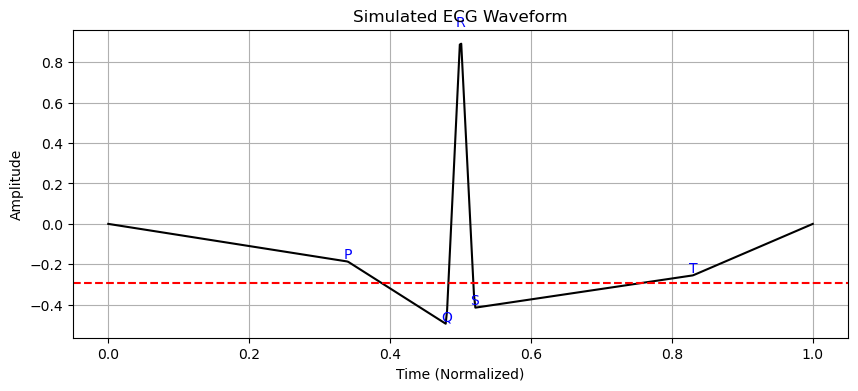

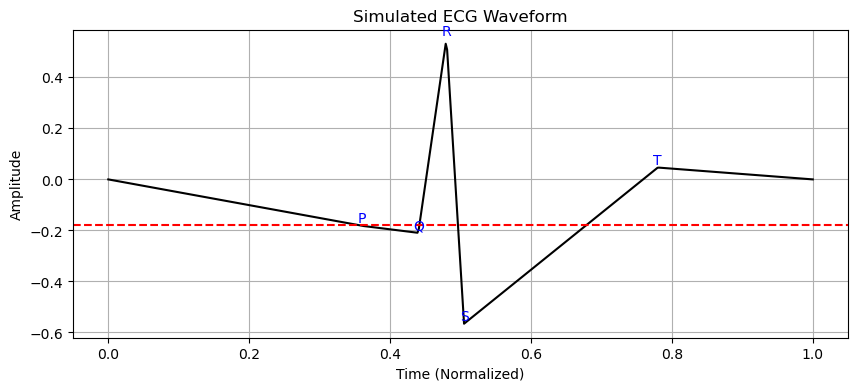

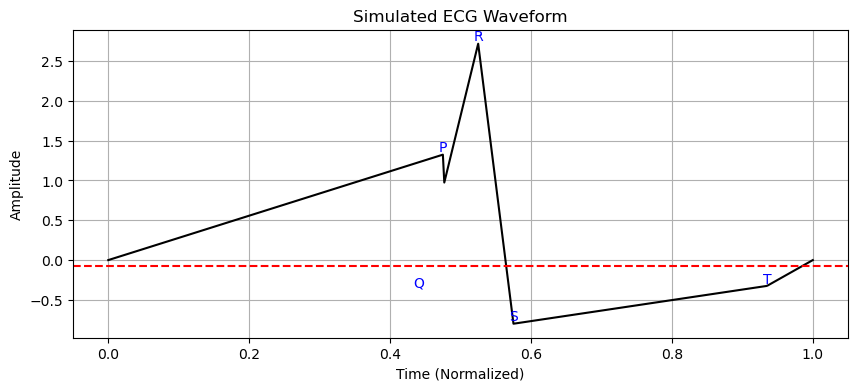

In [10]:
def plot_ECG(subset): 
    # Pos of the waves
    positions = [subset['P_pos'], subset['Q_pos'], subset['R_pos'], subset['S_pos'], subset['T_pos']]
    values = [subset['P_val'], subset['Q_val'], subset['R_val'], subset['S_val'], subset['T_val']]
    
    signal_mean = subset['signal_mean']
    
    # Add start/end points to ensure it starts and ends at 0
    positions = [0] + positions + [1]
    values = [0] + values + [0]
    
    # Line to connect the points
    positions_smooth = np.linspace(min(positions), max(positions), 500)
    values_smooth = np.interp(positions_smooth, positions, values)
    
    # Plot the graph
    plt.figure(figsize=(10, 4))
    plt.plot(positions_smooth, values_smooth, label='ECG waveform', color='black')

    plt.axhline(y=signal_mean, color='red', linestyle='--', label=f'Signal Mean ({signal_mean})')
    # Adding annotations
    plt.text(positions[3], values[3], 'R', ha='center', va='bottom', color='blue')
    plt.text(positions[1], values[1], 'P', ha='center', va='bottom', color='blue')
    plt.text(positions[2], values[2], 'Q', ha='center', va='bottom', color='blue')
    plt.text(positions[4], values[4], 'S', ha='center', va='bottom', color='blue')
    plt.text(positions[5], values[5], 'T', ha='center', va='bottom', color='blue')
    
    # Labels and grid
    plt.title('Simulated ECG Waveform')
    plt.xlabel('Time (Normalized)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()
plot_ECG(df.iloc[500])
plot_ECG(df.iloc[8000])
plot_ECG(df.iloc[10000])

### Taking random 1500 values for each of the labels and defining target columns 

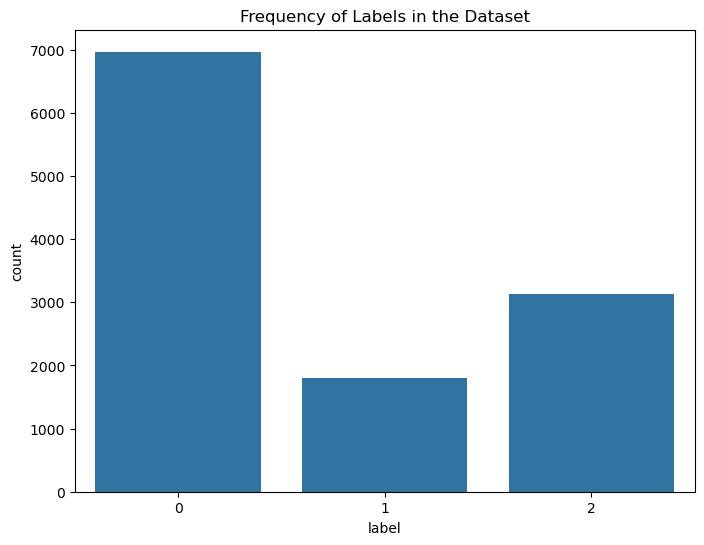

In [11]:
# Frequency plot (Dažnio diagramos) for 'label', that is why we took random 1500 values from each of the labels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.title("Frequency of Labels in the Dataset")
plt.show()

In [12]:
df.head()

RR_l_0  RR_l_0/RR_l_1  RR_l_1  RR_l_1/RR_l_2  RR_l_2  RR_l_2/RR_l_3  \
0     163       1.006173     162       1.006211     161       1.025478   
1     162       1.006211     161       1.025478     157       1.032895   
2     161       1.025478     157       1.032895     152       0.993464   
3     157       1.032895     152       0.993464     153       0.993506   
4     152       0.993464     153       0.993506     154         0.9625   

   RR_l_3  RR_l_3/RR_l_4  RR_l_4  RR_r_0  RR_r_0/RR_r_1  RR_r_1  \
0     157       1.032895     152     160       1.019108     157   
1     152       0.993464     153     157        1.00641     156   
2     153       0.993506     154     156       0.981132     159   
3     154         0.9625     160     159       1.012739     157   
4     160       0.952381     168     157       0.951515     165   

   RR_r_1/RR_r_2  RR_r_2  RR_r_2/RR_r_3  RR_r_3  RR_r_3/RR_r_4  RR_r_4  \
0        1.00641     156       0.981132     159       1.012739     157   
1       0.981132     159       1.012739     157       0.951515     164   
2       1.012739     157       0.951515     165       1.006098     164   
3       0.951515     165       1.006098     164       0.970414     169   
4       1.006098     164       0.970414     169        1.06962     158   

   seq_size  signal_mean  signal_std  wl_side  wr_side     P_val     Q_val  \
0       229    -0.258017    0.198386      117      112 -0.162309 -0.478559   
1       221    -0.246618    0.156043      112      109 -0.134829 -0.435035   
2       218    -0.247156    0.143232      109      109 -0.123644 -0.412486   
3       220    -0.238555    0.151657      109      111 -0.158933 -0.398859   
4       220     -0.17528    0.191063      111      109 -0.040549 -0.378127   

      R_val     S_val     T_val  P_pos  Q_pos  R_pos  S_pos  T_pos  label  
0  1.200719 -0.364887 -0.234295  0.385  0.485  0.515  0.535   0.82      0  
1  1.038892 -0.356168 -0.220179   0.39   0.49   0.51   0.53  0.875      0  
2  0.945564 -0.373377 -0.209684  0.335   0.48    0.5   0.52   0.81      0  
3  0.926406 -0.344995 -0.159368  0.355  0.475  0.495   0.52   0.79      0  
4  1.206714 -0.250729 -0.127746   0.38   0.48  0.505   0.53  0.835      0

In [13]:
df_orig = df.copy()
df.columns

Index(['RR_l_0', 'RR_l_0/RR_l_1', 'RR_l_1', 'RR_l_1/RR_l_2', 'RR_l_2',
       'RR_l_2/RR_l_3', 'RR_l_3', 'RR_l_3/RR_l_4', 'RR_l_4', 'RR_r_0',
       'RR_r_0/RR_r_1', 'RR_r_1', 'RR_r_1/RR_r_2', 'RR_r_2', 'RR_r_2/RR_r_3',
       'RR_r_3', 'RR_r_3/RR_r_4', 'RR_r_4', 'seq_size', 'signal_mean',
       'signal_std', 'wl_side', 'wr_side', 'P_val', 'Q_val', 'R_val', 'S_val',
       'T_val', 'P_pos', 'Q_pos', 'R_pos', 'S_pos', 'T_pos', 'label'],
      dtype='object')

In [14]:
df = df_orig.copy()
target_cols = ['RR_l_0', 'RR_l_0/RR_l_1', 'RR_l_1', 'RR_l_1/RR_l_2', 'RR_l_2',
       'RR_l_2/RR_l_3', 'RR_l_3', 'RR_l_3/RR_l_4', 'RR_l_4', 'RR_r_0',
       'RR_r_0/RR_r_1', 'RR_r_1', 'RR_r_1/RR_r_2', 'RR_r_2', 'RR_r_2/RR_r_3',
       'RR_r_3', 'RR_r_3/RR_r_4', 'RR_r_4', 'label', 'seq_size', 'signal_mean', 'signal_std']
df = df[target_cols]
# each time running this will give different 1000 rows
df = df.groupby('label', group_keys=False).apply(lambda x: x.sample(n=1500)).reset_index(drop=True)

df.groupby('label')['label'].count()

C:\Users\edvar\AppData\Local\Temp\ipykernel_47456\3353847934.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('label', group_keys=False).apply(lambda x: x.sample(n=1500)).reset_index(drop=True)


label
0    1500
1    1500
2    1500
Name: label, dtype: Int64

In [15]:
df = df_orig.copy()

target_cols = ['P_val', 'Q_val', 'R_val', 'S_val',
        'P_pos', 'Q_pos', 'R_pos', 'S_pos', 'signal_mean', 'signal_std', 'label']
df = df[target_cols]
# each time running this will give different 1000 rows
df = df.groupby('label', group_keys=False).apply(lambda x: x.sample(n=1500)).reset_index(drop=True)

df.groupby('label')['label'].count()

C:\Users\edvar\AppData\Local\Temp\ipykernel_47456\53790404.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('label', group_keys=False).apply(lambda x: x.sample(n=1500)).reset_index(drop=True)


label
0    1500
1    1500
2    1500
Name: label, dtype: Int64

In [16]:
df0 = df[df.label == 0]
df1 = df[df.label == 1]
df2 = df[df.label == 2]

In [17]:
df.iloc[0:1]

P_val     Q_val     R_val     S_val  P_pos  Q_pos  R_pos  S_pos  \
0 -0.107758 -0.289545  1.105736 -0.453619  0.335   0.46  0.495   0.56   

   signal_mean  signal_std  label  
0    -0.242707    0.230662      0

## Data Analyzation

### Normalization of the data

In [18]:
df.columns

Index(['P_val', 'Q_val', 'R_val', 'S_val', 'P_pos', 'Q_pos', 'R_pos', 'S_pos',
       'signal_mean', 'signal_std', 'label'],
      dtype='object')

In [19]:
dfn = df.copy()
dfminmax = df.copy()
# vidurkio ir dispersijos (Z-score normalization)
#normalization_cols = ['RR_l_0', 'RR_l_0/RR_l_1', 'RR_l_1', 'RR_r_0', 'RR_r_0/RR_r_1', 'RR_r_1']
normalization_cols = ['P_val', 'Q_val', 'R_val', 'S_val', 'signal_mean', 'signal_std']
for col in normalization_cols:
    dfn[col] = (dfn[col] - dfn[col].mean()) / dfn[col].std()
    #min-max normalization
    dfminmax[col] = (dfminmax[col] - dfminmax[col].min()) / (dfminmax[col].max() - dfminmax[col].min())

In [20]:
df.describe()

P_val     Q_val     R_val     S_val     P_pos     Q_pos     R_pos  \
count    4500.0    4500.0    4500.0    4500.0    4500.0    4500.0    4500.0   
mean   0.104283 -0.291213  1.125888 -0.459369  0.373524  0.423291  0.479343   
std    0.469017  0.495281  0.617157  0.492375  0.114273   0.10873  0.108255   
min   -1.155624 -2.641278 -0.456913 -2.576826     0.055      0.01      0.06   
25%   -0.204207 -0.451308  0.630009 -0.595514      0.31      0.36     0.435   
50%   -0.096894 -0.256162  0.992789 -0.467526     0.355      0.46       0.5   
75%    0.384152 -0.128493  1.566102 -0.273785     0.445     0.475     0.515   
max    2.496907  2.658497  3.137667   2.59317      0.86     0.855     0.915   

          S_pos  signal_mean  signal_std     label  
count    4500.0       4500.0      4500.0    4500.0  
mean   0.532967    -0.183999     0.32401       1.0  
std    0.129019     0.144343    0.195463  0.816587  
min       0.125    -1.621081    0.061549       0.0  
25%       0.495    -0.254139    0.158345       0.0  
50%        0.53    -0.183315    0.265108       1.0  
75%       0.575    -0.106731    0.465423       2.0  
max       0.995     1.048342    1.137607       2.0

In [21]:
dfn.describe()

P_val     Q_val     R_val     S_val     P_pos     Q_pos     R_pos  \
count    4500.0    4500.0    4500.0    4500.0    4500.0    4500.0    4500.0   
mean        0.0       0.0       0.0      -0.0  0.373524  0.423291  0.479343   
std         1.0       1.0       1.0       1.0  0.114273   0.10873  0.108255   
min   -2.686269 -4.744913 -2.564666 -4.300501     0.055      0.01      0.06   
25%   -0.657737 -0.323241  -0.80349 -0.276508      0.31      0.36     0.435   
50%   -0.428932  0.070769 -0.215665 -0.016568     0.355      0.46       0.5   
75%    0.596713  0.328541  0.713293  0.376915     0.445     0.475     0.515   
max    5.101356  5.955629  3.259753  6.199625      0.86     0.855     0.915   

          S_pos  signal_mean  signal_std     label  
count    4500.0       4500.0      4500.0    4500.0  
mean   0.532967         -0.0        -0.0       1.0  
std    0.129019          1.0         1.0  0.816587  
min       0.125    -9.956013   -1.342764       0.0  
25%       0.495     -0.48592   -0.847549       0.0  
50%        0.53     0.004739   -0.301345       1.0  
75%       0.575     0.535313    0.723477       2.0  
max       0.995     8.537584    4.162409       2.0

In [22]:
dfminmax.describe()

P_val     Q_val     R_val     S_val     P_pos     Q_pos     R_pos  \
count    4500.0    4500.0    4500.0    4500.0    4500.0    4500.0    4500.0   
mean   0.344941  0.443427   0.44033  0.409567  0.373524  0.423291  0.479343   
std    0.128409  0.093453  0.171691  0.095237  0.114273   0.10873  0.108255   
min         0.0       0.0       0.0       0.0     0.055      0.01      0.06   
25%    0.260481  0.413219  0.302378  0.383233      0.31      0.36     0.435   
50%    0.289862  0.450041  0.403302  0.407989     0.355      0.46       0.5   
75%    0.421564  0.474131  0.562796  0.445463     0.445     0.475     0.515   
max         1.0       1.0       1.0       1.0      0.86     0.855     0.915   

          S_pos  signal_mean  signal_std     label  
count    4500.0       4500.0      4500.0    4500.0  
mean   0.532967     0.538349    0.243909       1.0  
std    0.129019     0.054073    0.181647  0.816587  
min       0.125          0.0         0.0       0.0  
25%       0.495     0.512074    0.089954       0.0  
50%        0.53     0.538605    0.189171       1.0  
75%       0.575     0.567295    0.375327       2.0  
max       0.995          1.0         1.0       2.0

<Axes: ylabel='Count'>

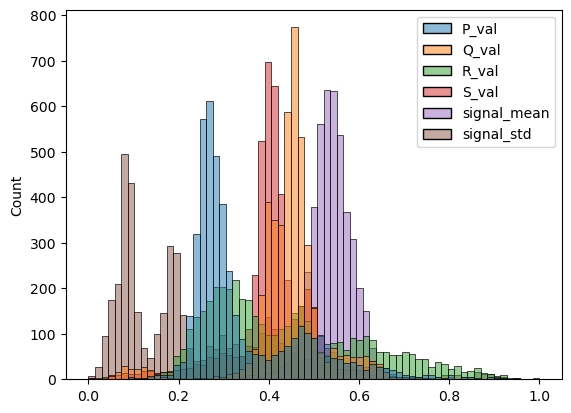

In [23]:
sns.histplot(dfminmax[normalization_cols])

<Axes: ylabel='Count'>

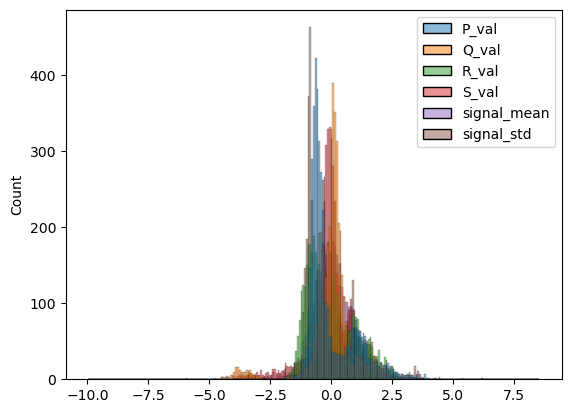

In [24]:
sns.histplot(dfn[normalization_cols])

<Axes: ylabel='Count'>

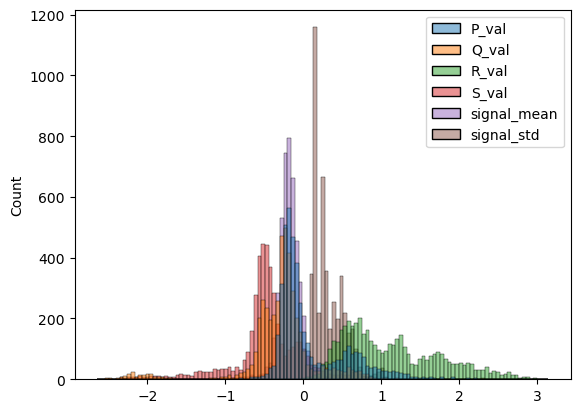

In [25]:
sns.histplot(df[normalization_cols])

In [26]:
dfn[normalization_cols].describe()

P_val     Q_val     R_val     S_val  signal_mean  signal_std
count    4500.0    4500.0    4500.0    4500.0       4500.0      4500.0
mean        0.0       0.0       0.0      -0.0         -0.0        -0.0
std         1.0       1.0       1.0       1.0          1.0         1.0
min   -2.686269 -4.744913 -2.564666 -4.300501    -9.956013   -1.342764
25%   -0.657737 -0.323241  -0.80349 -0.276508     -0.48592   -0.847549
50%   -0.428932  0.070769 -0.215665 -0.016568     0.004739   -0.301345
75%    0.596713  0.328541  0.713293  0.376915     0.535313    0.723477
max    5.101356  5.955629  3.259753  6.199625     8.537584    4.162409

In [27]:
dfminmax[normalization_cols].describe()

P_val     Q_val     R_val     S_val  signal_mean  signal_std
count    4500.0    4500.0    4500.0    4500.0       4500.0      4500.0
mean   0.344941  0.443427   0.44033  0.409567     0.538349    0.243909
std    0.128409  0.093453  0.171691  0.095237     0.054073    0.181647
min         0.0       0.0       0.0       0.0          0.0         0.0
25%    0.260481  0.413219  0.302378  0.383233     0.512074    0.089954
50%    0.289862  0.450041  0.403302  0.407989     0.538605    0.189171
75%    0.421564  0.474131  0.562796  0.445463     0.567295    0.375327
max         1.0       1.0       1.0       1.0          1.0         1.0

In [28]:
df[normalization_cols].describe()

P_val     Q_val     R_val     S_val  signal_mean  signal_std
count    4500.0    4500.0    4500.0    4500.0       4500.0      4500.0
mean   0.104283 -0.291213  1.125888 -0.459369    -0.183999     0.32401
std    0.469017  0.495281  0.617157  0.492375     0.144343    0.195463
min   -1.155624 -2.641278 -0.456913 -2.576826    -1.621081    0.061549
25%   -0.204207 -0.451308  0.630009 -0.595514    -0.254139    0.158345
50%   -0.096894 -0.256162  0.992789 -0.467526    -0.183315    0.265108
75%    0.384152 -0.128493  1.566102 -0.273785    -0.106731    0.465423
max    2.496907  2.658497  3.137667   2.59317     1.048342    1.137607

In [29]:
df.head()

P_val     Q_val     R_val     S_val  P_pos  Q_pos  R_pos  S_pos  \
0 -0.107758 -0.289545  1.105736 -0.453619  0.335   0.46  0.495   0.56   
1 -0.167601 -0.522389  0.876296 -0.439286  0.385  0.485   0.51  0.525   
2 -0.137056 -0.361945    1.1477 -0.530452  0.345   0.47  0.505  0.575   
3 -0.178068 -0.374538  2.092552 -0.954176  0.325  0.495  0.535  0.585   
4 -0.221757 -0.534404  1.772309 -0.427371   0.35  0.485   0.51  0.535   

   signal_mean  signal_std  label  
0    -0.242707    0.230662      0  
1    -0.289555    0.149219      0  
2    -0.265278    0.232489      0  
3    -0.276097    0.566159      0  
4    -0.216125    0.275084      0

### Removing outliers to see different result, only include if we can draw some conclusion from that

### Correalation code

In [30]:
def cor_func(corr_columns, df):
    df_corr = df[corr_columns].corr()
    
    plt.figure(figsize=(10, 8))
    plt.imshow(df_corr, cmap='coolwarm', interpolation='none')
    plt.colorbar(label='Correlation Coefficient')
    plt.xticks(range(len(corr_columns)), corr_columns, rotation=45, ha='right')
    plt.yticks(range(len(corr_columns)), corr_columns)

In [31]:
df.corr()

P_val     Q_val     R_val     S_val     P_pos     Q_pos  \
P_val        1.000000  0.112732  0.342090  0.072584  0.368808 -0.102309   
Q_val        0.112732  1.000000 -0.086638  0.047993  0.007298  0.209981   
R_val        0.342090 -0.086638  1.000000 -0.275151 -0.107491 -0.055442   
S_val        0.072584  0.047993 -0.275151  1.000000  0.355919  0.239952   
P_pos        0.368808  0.007298 -0.107491  0.355919  1.000000  0.663706   
Q_pos       -0.102309  0.209981 -0.055442  0.239952  0.663706  1.000000   
R_pos        0.088693 -0.037006 -0.065096  0.296114  0.840977  0.893746   
S_pos        0.258935 -0.025427  0.008881  0.232165  0.858015  0.772997   
signal_mean  0.253226  0.235833 -0.010152  0.287288  0.110656  0.048881   
signal_std   0.724817 -0.032640  0.565883 -0.122607  0.345259 -0.025233   
label        0.599246  0.135100 -0.240871  0.118734  0.241092 -0.314114   

                R_pos     S_pos  signal_mean  signal_std     label  
P_val        0.088693  0.258935     0.253226    0.724817  0.599246  
Q_val       -0.037006 -0.025427     0.235833   -0.032640  0.135100  
R_val       -0.065096  0.008881    -0.010152    0.565883 -0.240871  
S_val        0.296114  0.232165     0.287288   -0.122607  0.118734  
P_pos        0.840977  0.858015     0.110656    0.345259  0.241092  
Q_pos        0.893746  0.772997     0.048881   -0.025233 -0.314114  
R_pos        1.000000  0.938235     0.078675    0.184774 -0.086470  
S_pos        0.938235  1.000000     0.064862    0.380771  0.069917  
signal_mean  0.078675  0.064862     1.000000   -0.041993  0.126477  
signal_std   0.184774  0.380771    -0.041993    1.000000  0.451700  
label       -0.086470  0.069917     0.126477    0.451700  1.000000

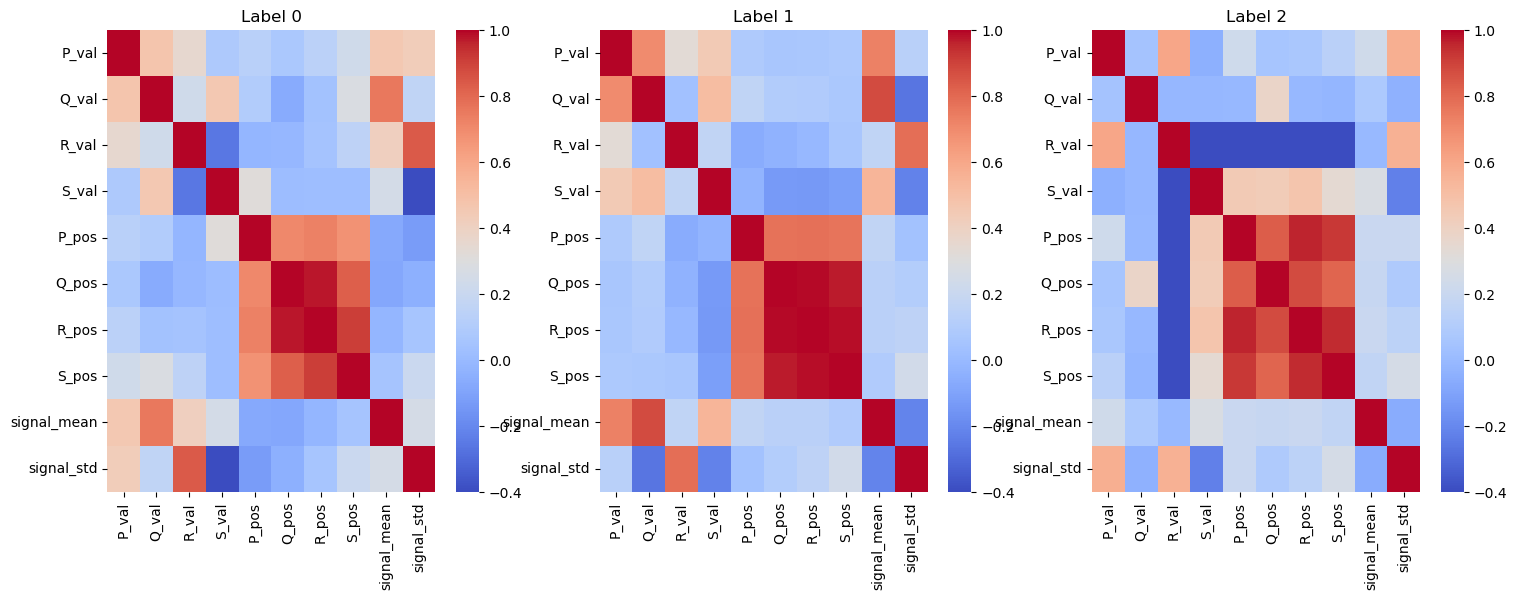

In [32]:
# Koreliacijos prieš ir po normalizavimo (excluding 'label' column)
corr_df0 = df0.drop(columns=['label']).corr()
corr_df1 = df1.drop(columns=['label']).corr()
corr_df2 = df2.drop(columns=['label']).corr()

# Pateikiame koreliacijos matricas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(corr_df0, ax=axes[0], annot=False, cmap="coolwarm", vmin=-0.4, vmax=1)
axes[0].set_title("Label 0")
sns.heatmap(corr_df1, ax=axes[1], annot=False, cmap="coolwarm", vmin=-0.4, vmax=1)
axes[1].set_title("Label 1")
sns.heatmap(corr_df2, ax=axes[2], annot=False, cmap="coolwarm", vmin=-0.4, vmax=1)
axes[2].set_title("Label 2")
plt.show()


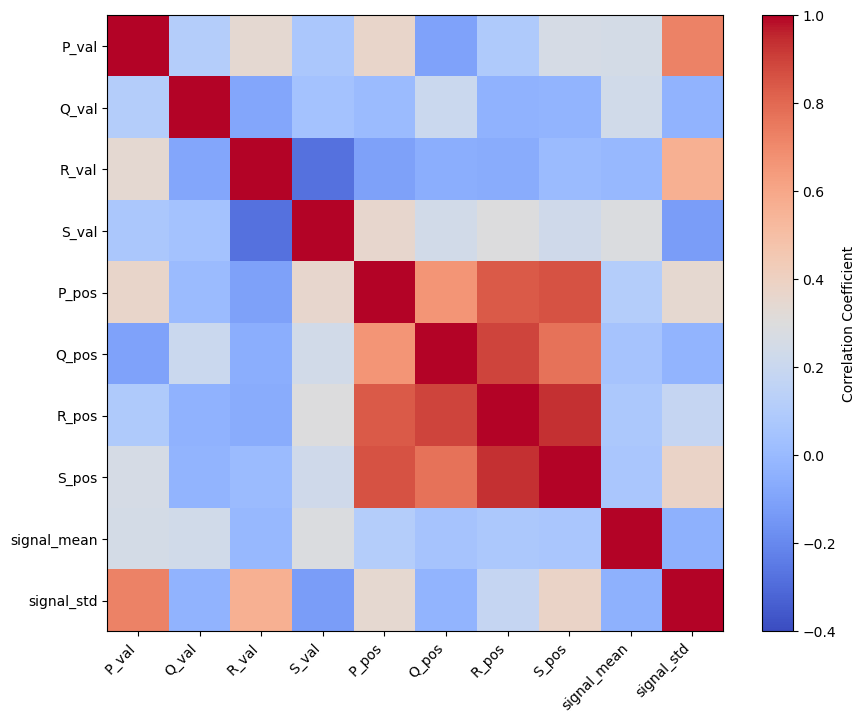

In [33]:
# Koreliacijos prieš ir po normalizavimo
corr_df = df.drop(columns=['label']).corr()

target_cols_no_label = [col for col in df.columns if col != 'label']

plt.figure(figsize=(10, 8))
plt.imshow(corr_df, cmap='coolwarm', interpolation='none', vmin=-0.4, vmax=1)  # Set the color range from -0.4 to 1
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(target_cols_no_label)), target_cols_no_label, rotation=45, ha='right')
plt.yticks(range(len(target_cols_no_label)), target_cols_no_label)
plt.show()


### Visualisation

In [34]:
df.columns

Index(['P_val', 'Q_val', 'R_val', 'S_val', 'P_pos', 'Q_pos', 'R_pos', 'S_pos',
       'signal_mean', 'signal_std', 'label'],
      dtype='object')

In [35]:
# Create a figure for the scatter plot with regression lines
plt.figure(figsize=(8, 6))

# Scatter plot with regression lines
sns.lmplot(x='signal_std', y='seq_size', hue='label', data=df, height=6, aspect=1.5, markers=["o", "s", "D"])
plt.title('Relationship Between P_val and signal_mean Across Labels')
plt.xlabel('RR_l_0/RR_l_1')
plt.ylabel('RR_l_1/RR_l_2')

# Show the plot
plt.show()

KeyError: "['seq_size'] not in index"

<Figure size 800x600 with 0 Axes>

In [ ]:
# cia tipo galima paminet, kad 'label
sns.histplot(df[['seq_size', 'label']], x='seq_size', hue = 'label', bins=60)

In [ ]:
sns.histplot(df[['signal_mean', 'label']], x='signal_mean', hue = 'label', bins=60)

In [ ]:
# cia galima pamineti, kad normaliu pupsnio signal std linkes but arti nulio

plt.figure(figsize=(8, 6))
sns.histplot(df[['signal_std', 'label']], x='signal_std', hue = 'label')
plt.title('Histogram of signal_std Across Labels')
plt.xlabel('signal_std')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='signal_std', hue='label', fill=True)
plt.title('KDE Plot of signal_std Across Labels')
plt.xlabel('signal_std')
plt.ylabel('Density')
plt.show()

In [36]:
df0P = df0[['P_val', 'P_pos']].rename(columns={'P_val':'P_val0', 'P_pos':'P_pos0'})
df1P = df1[['P_val', 'P_pos']].rename(columns={'P_val':'P_val1', 'P_pos':'P_pos1'})
df2P = df2[['P_val', 'P_pos']].rename(columns={'P_val':'P_val2', 'P_pos':'P_pos2'})

In [37]:
pd.concat([df0P, df1P, df2P], axis=1).head()

P_val0  P_pos0  P_val1  P_pos1  P_val2  P_pos2
0 -0.107758   0.335    <NA>    <NA>    <NA>    <NA>
1 -0.167601   0.385    <NA>    <NA>    <NA>    <NA>
2 -0.137056   0.345    <NA>    <NA>    <NA>    <NA>
3 -0.178068   0.325    <NA>    <NA>    <NA>    <NA>
4 -0.221757    0.35    <NA>    <NA>    <NA>    <NA>

In [38]:
df.columns

Index(['P_val', 'Q_val', 'R_val', 'S_val', 'P_pos', 'Q_pos', 'R_pos', 'S_pos',
       'signal_mean', 'signal_std', 'label'],
      dtype='object')

In [39]:
# Setting up the plotting area
plt.figure(figsize=(16, 12))

#sns.pairplot(data = dfminmax[['P_val', 'Q_val', 'R_val', 'signal_mean', 'label']], hue='label')
sns.pairplot(data = df[['RR_l_0', 'RR_l_1', 'RR_r_0', 'RR_r_1', 'label']], hue='label')
plt.suptitle("Pairplot of ECG Wave Features", y=1.05)
plt.show()

df.describe()

KeyError: "['RR_l_0', 'RR_l_1', 'RR_r_0', 'RR_r_1'] not in index"

<Figure size 1600x1200 with 0 Axes>

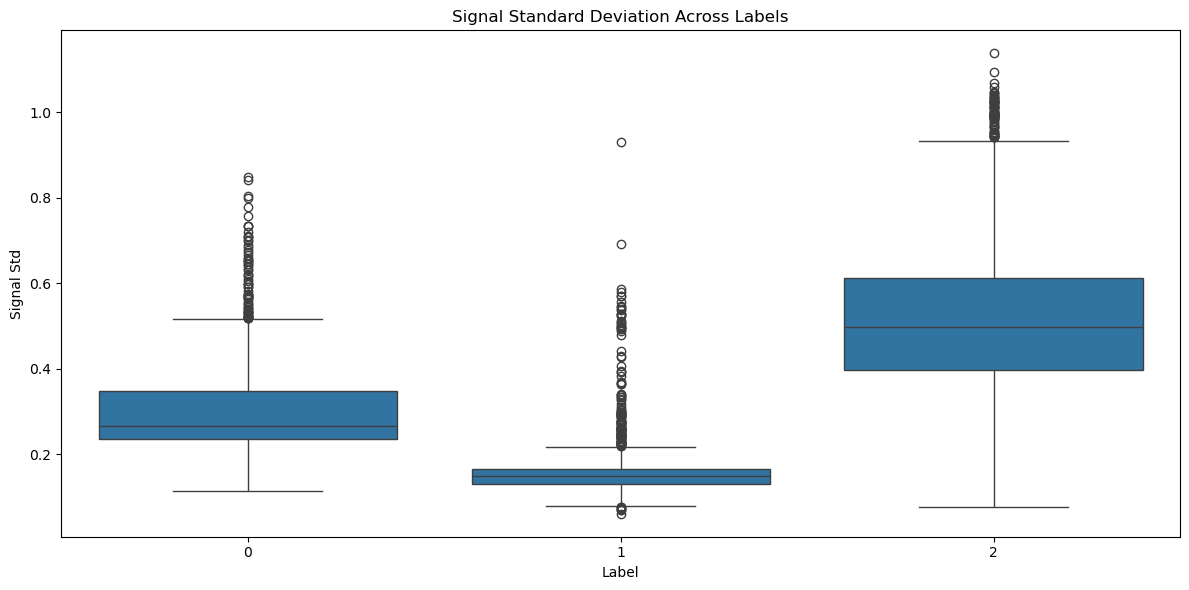

In [40]:
# Create a figure for side-by-side comparison of 'signal_mean' and 'signal_std'
plt.figure(figsize=(12, 6))
# Plot signal_std with boxplot across labels
sns.boxplot(x='label', y='signal_std', data=df)
plt.title('Signal Standard Deviation Across Labels')
plt.xlabel('Label')
plt.ylabel('Signal Std')

# Display the plot
plt.tight_layout()
plt.show()

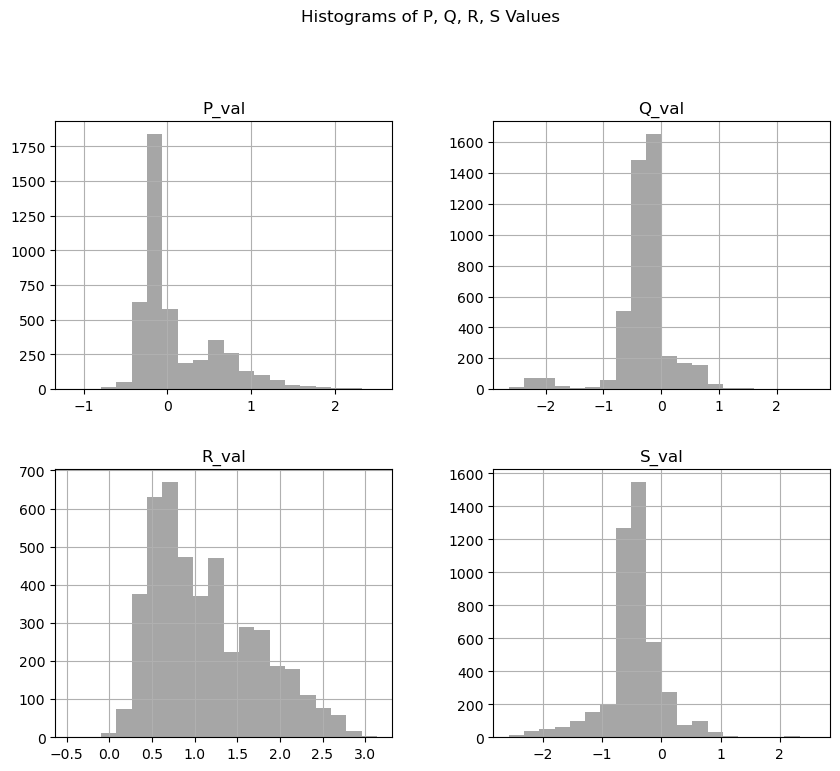

In [41]:
# 3. Histograms for the ECG values
df[['P_val', 'Q_val', 'R_val', 'S_val']].hist(bins=20, figsize=(10, 8), color='gray', alpha=0.7)
plt.suptitle("Histograms of P, Q, R, S Values", y=1.02)
plt.show()


ValueError: The following variable cannot be assigned with wide-form data: `hue`

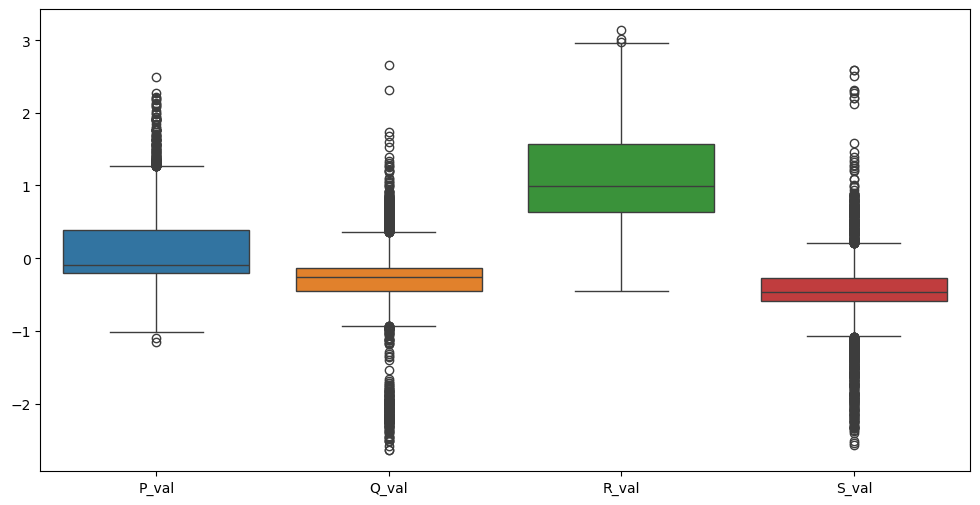

In [42]:
# 4. Box plots (Stačiakampės diagramos) to see distributions of the wave positions and amplitudes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['P_val', 'Q_val', 'R_val', 'S_val']])
sns.stripplot(data=df[['P_val', 'Q_val', 'R_val', 'S_val', 'label']], hue=df['label'], dodge=True, jitter=True, marker='o', alpha=0.7)
plt.title("Boxplot of P, Q, R, S Values")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['P_pos', 'Q_pos', 'R_pos', 'S_pos']])
sns.stripplot(data=df[['P_pos', 'Q_pos', 'R_pos', 'S_pos', 'label']], hue=df['label'], dodge=True, jitter=True, marker='o', alpha=0.7)
plt.title("Boxplot of P, Q, R, S Positions")
plt.show()

In [36]:
normalization_cols

['RR_l_0', 'RR_l_0/RR_l_1', 'RR_l_1', 'RR_r_0', 'RR_r_0/RR_r_1', 'RR_r_1']

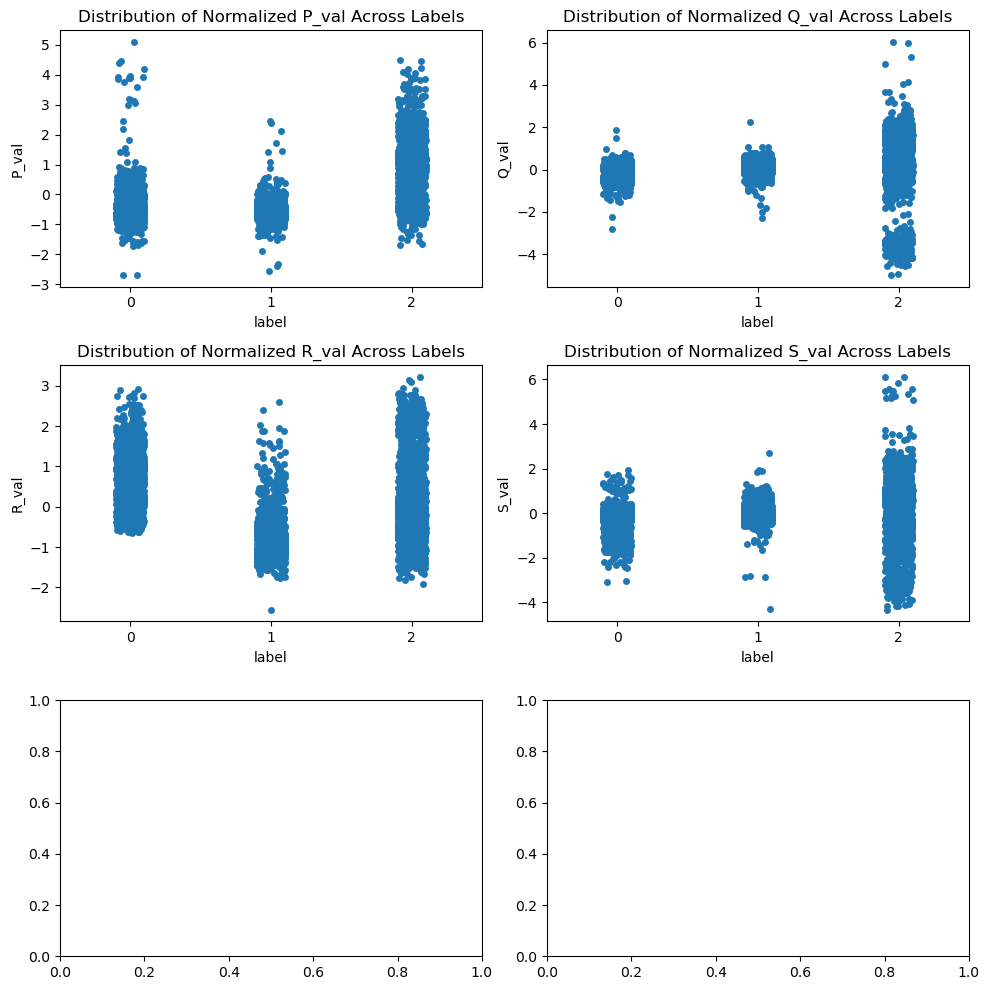

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))  # 3x2 grid for the subplots
columns2 = normalization_cols


# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the columns and create a stripplot for each on the respective subplot
for i, column in enumerate(columns2):
    sns.stripplot(x='label', y=column, data=dfn, ax=axes[i])
    axes[i].set_title(f'Distribution of Normalized {column} Across Labels')

plt.tight_layout()
plt.show()

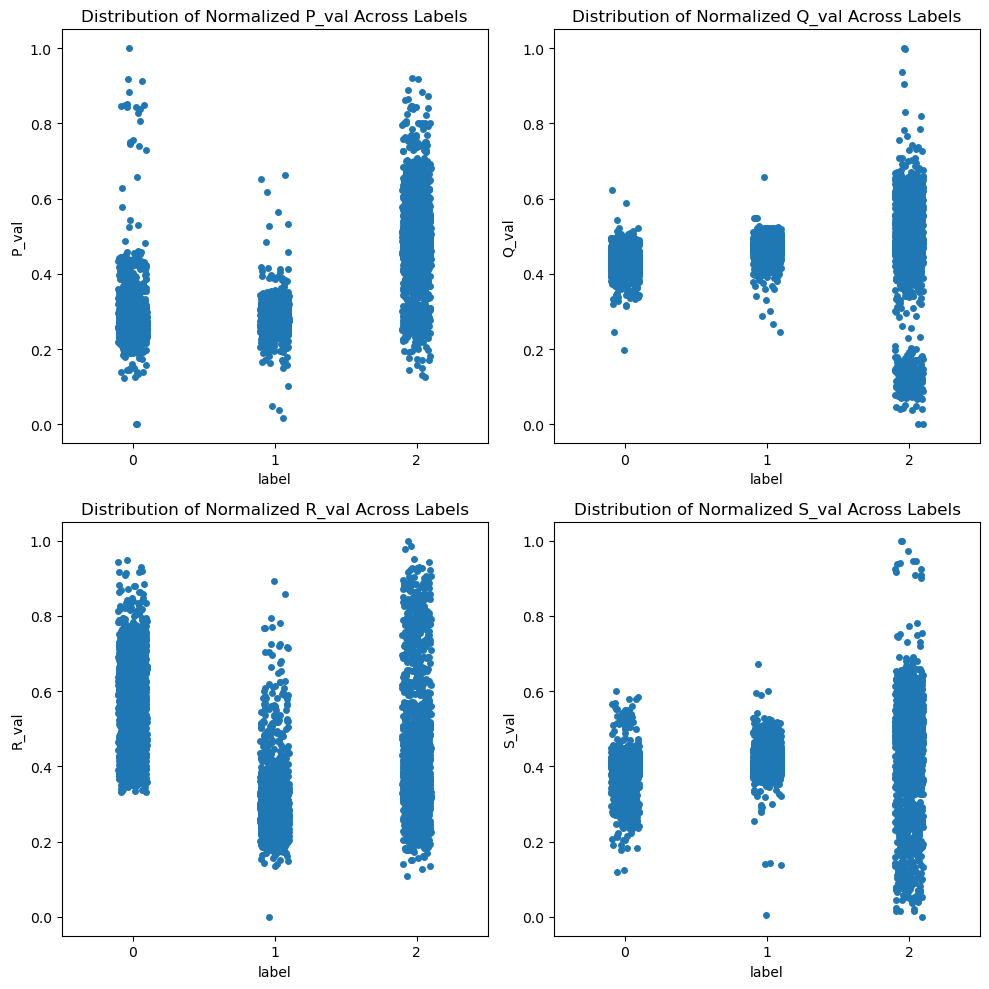

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 grid for the subplots
columns = ['P_val', 'Q_val', 'R_val', 'S_val']
columns2 = ['P_pos', 'Q_pos', 'R_pos', 'S_pos']


# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the columns and create a stripplot for each on the respective subplot
for i, column in enumerate(columns):
    sns.stripplot(x='label', y=column, data=dfminmax, ax=axes[i])
    axes[i].set_title(f'Distribution of Normalized {column} Across Labels')
plt.tight_layout()

plt.show()

### Spaghetti chart

C:\Users\edvar\AppData\Local\Temp\ipykernel_7184\159978189.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('label').apply(lambda x: x.sample(20)).reset_index(drop=True)


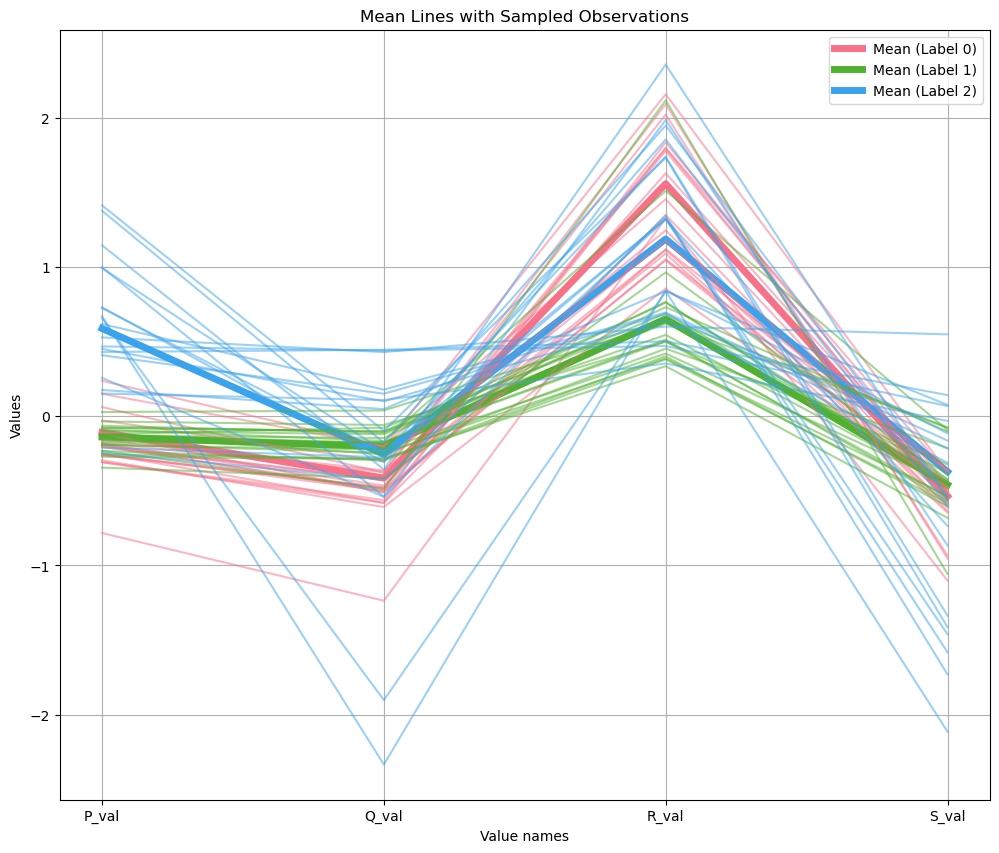

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your value columns
vals_columns = ['P_val', 'Q_val', 'R_val', 'S_val']

# Calculate the mean for each label group
plt.figure(figsize=(12, 10))
df_mean = df.groupby('label')[vals_columns].mean()

# Define the color palette based on the unique labels
unique_labels = df['label'].unique()
palette = sns.color_palette('husl', n_colors=len(unique_labels))
label_color_dict = dict(zip(unique_labels, palette))

# Plot the mean lines for each label with specified colors
for label in unique_labels:
    plt.plot(vals_columns, df_mean.loc[label], label=f'Mean (Label {label})', lw=5, color=label_color_dict[label])

# Sample 20 observations per label for individual lines
df_sampled = df.groupby('label').apply(lambda x: x.sample(20)).reset_index(drop=True)

# Plot individual lines with correct colors
for i in range(len(df_sampled)):
    label = df_sampled.iloc[i]['label']
    plt.plot(vals_columns, df_sampled.iloc[i][vals_columns], 
             color=label_color_dict[label], alpha=0.5)

# Add labels and legend
plt.title("Mean Lines with Sampled Observations")
plt.xlabel("Value names")
plt.ylabel("Values")
plt.legend()
plt.grid(True)

plt.show()


In [66]:
df.groupby('label')['label'].count()

label
0    1500
1    1500
2    1500
Name: label, dtype: Int64

In [71]:
df[df.label == 0].describe()

P_val     Q_val     R_val     S_val     P_pos     Q_pos     R_pos  \
count    1500.0    1500.0    1500.0    1500.0    1500.0    1500.0    1500.0   
mean  -0.108577 -0.414039  1.558033 -0.536195  0.362763   0.47354  0.508193   
std    0.287227  0.174454  0.450493  0.251785  0.061057  0.063284   0.06361   
min   -1.157755 -1.657999  0.596941 -1.979232      0.08      0.09     0.135   
25%   -0.242435 -0.526019  1.198175 -0.577351     0.335      0.46     0.495   
50%   -0.166847 -0.437957  1.568649 -0.489336      0.35      0.47     0.505   
75%   -0.057162 -0.296547  1.866402 -0.415043     0.385      0.48      0.51   
max    2.138238  0.440569  2.940576  0.472058      0.69      0.85      0.87   

          S_pos  signal_mean   label  
count    1500.0       1500.0  1500.0  
mean   0.552033    -0.219702     0.0  
std    0.073694     0.134728     0.0  
min        0.16    -1.230984     0.0  
25%       0.525    -0.289159     0.0  
50%       0.535    -0.232853     0.0  
75%        0.57    -0.165563     0.0  
max       0.935     0.599224     0.0

In [72]:
df[df.label == 1].describe()

P_val     Q_val     R_val     S_val     P_pos     Q_pos     R_pos  \
count    1500.0    1500.0    1500.0    1500.0    1500.0    1500.0    1500.0   
mean  -0.139084 -0.204353  0.652283 -0.459156  0.327017  0.403217  0.441973   
std    0.151953  0.141712  0.338039  0.202167  0.094381  0.092121  0.099417   
min   -1.013475 -1.405318  0.001993 -2.576826     0.055      0.01      0.06   
25%   -0.217388 -0.264825  0.456024 -0.572832     0.265      0.34     0.375   
50%   -0.159426 -0.204773  0.588244 -0.491217      0.32      0.45     0.495   
75%    -0.07415  -0.12739  0.739562 -0.371563      0.41     0.465     0.505   
max    1.261156  0.806477  2.755556  0.889485      0.62      0.78     0.805   

          S_pos  signal_mean   label  
count    1500.0       1500.0  1500.0  
mean   0.471253    -0.150266     1.0  
std    0.103102     0.124594     0.0  
min       0.125    -1.621081     1.0  
25%       0.405    -0.213201     1.0  
50%        0.52    -0.154634     1.0  
75%        0.53    -0.082799     1.0  
max        0.87     0.803674     1.0

In [73]:
df[df.label == 2].describe()

P_val     Q_val     R_val     S_val     P_pos     Q_pos     R_pos  \
count    1500.0    1500.0    1500.0    1500.0    1500.0    1500.0    1500.0   
mean   0.587618  -0.25537  1.187438 -0.372124   0.42951   0.38945  0.485653   
std    0.476704  0.807521   0.65333  0.795134  0.144142  0.137306  0.137326   
min   -0.818166 -2.716884 -0.124974 -2.603065      0.06      0.05      0.08   
25%    0.344021 -0.393549   0.71314 -0.795546      0.31     0.275     0.355   
50%    0.599326 -0.179352  1.006191 -0.158325     0.445      0.38       0.5   
75%    0.837657  0.256658  1.527024  0.059877      0.56     0.485      0.61   
max    2.209313  2.640441  3.137667   2.69908     0.815      0.87     0.895   

          S_pos  signal_mean   label  
count    1500.0       1500.0  1500.0  
mean   0.572923    -0.174921     2.0  
std    0.165337       0.1587     0.0  
min        0.17    -1.482192     2.0  
25%       0.415    -0.239519     2.0  
50%       0.585    -0.161395     2.0  
75%        0.73    -0.084705     2.0  
max       0.995     0.824736     2.0

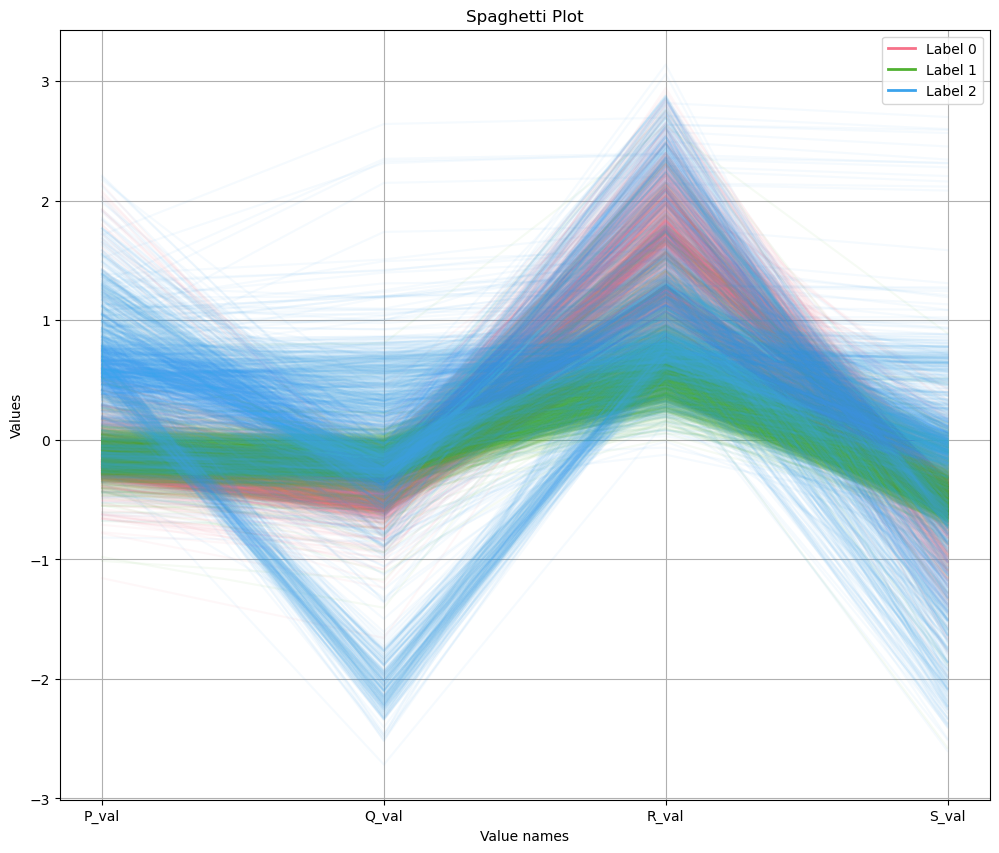

In [76]:

# Define your value columns
vals_columns = ['P_val', 'Q_val', 'R_val', 'S_val']

# Create a figure
plt.figure(figsize=(12, 10))

# Define the color palette based on the unique labels
unique_labels = df['label'].unique()
palette = sns.color_palette('husl', n_colors=len(unique_labels))
label_color_dict = dict(zip(unique_labels, palette))

# Plot a line for each observation with correct colors
for i in range(len(df)):
    label = df.iloc[i]['label']
    plt.plot(vals_columns, df.iloc[i][vals_columns], color=label_color_dict[label], alpha=0.05)

# Create custom legend handles
legend_elements = [Line2D([0], [0], color=label_color_dict[label], lw=2, label=f'Label {label}') for label in unique_labels]

# Add the custom legend to the plot
plt.legend(handles=legend_elements)
plt.title("Spaghetti Plot")
plt.xlabel("Value names")
plt.ylabel("Values")
plt.grid(True)

# Show the plot
plt.show()


In [28]:
df.columns

Index(['P_val', 'Q_val', 'R_val', 'S_val', 'P_pos', 'Q_pos', 'R_pos', 'S_pos',
       'signal_mean', 'label'],
      dtype='object')

In [30]:
df.corr()

P_val     Q_val     R_val     S_val     P_pos     Q_pos  \
P_val        1.000000  0.105031  0.354746  0.087590  0.361240 -0.116581   
Q_val        0.105031  1.000000 -0.081855  0.037893 -0.002527  0.200081   
R_val        0.354746 -0.081855  1.000000 -0.254284 -0.090060 -0.046688   
S_val        0.087590  0.037893 -0.254284  1.000000  0.342323  0.223198   
P_pos        0.361240 -0.002527 -0.090060  0.342323  1.000000  0.660816   
Q_pos       -0.116581  0.200081 -0.046688  0.223198  0.660816  1.000000   
R_pos        0.077557 -0.040153 -0.054270  0.278482  0.838120  0.896540   
S_pos        0.249146 -0.026366  0.016737  0.220576  0.856126  0.775420   
signal_mean  0.250944  0.231979 -0.008280  0.287754  0.102849  0.042749   
label        0.601188  0.131672 -0.243490  0.134010  0.239597 -0.316066   

                R_pos     S_pos  signal_mean     label  
P_val        0.077557  0.249146     0.250944  0.601188  
Q_val       -0.040153 -0.026366     0.231979  0.131672  
R_val       -0.054270  0.016737    -0.008280 -0.243490  
S_val        0.278482  0.220576     0.287754  0.134010  
P_pos        0.838120  0.856126     0.102849  0.239597  
Q_pos        0.896540  0.775420     0.042749 -0.316066  
R_pos        1.000000  0.937809     0.075128 -0.085152  
S_pos        0.937809  1.000000     0.065772  0.066639  
signal_mean  0.075128  0.065772     1.000000  0.127893  
label       -0.085152  0.066639     0.127893  1.000000

In [20]:
df.columns

Index(['P_val', 'Q_val', 'R_val', 'S_val', 'P_pos', 'Q_pos', 'R_pos', 'S_pos',
       'signal_mean', 'signal_std', 'label'],
      dtype='object')

<Figure size 800x600 with 0 Axes>

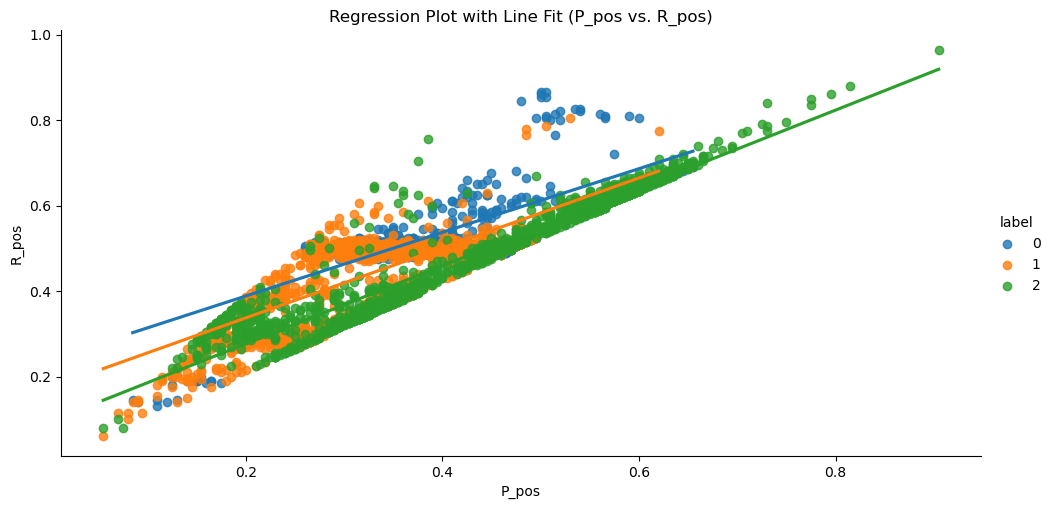

In [19]:
# Create a regression plot with a fitted line
plt.figure(figsize=(8, 6))
sns.lmplot(x='P_pos', y='R_pos', hue='label', data=df, aspect=2, ci=None)  # ci=None removes the confidence interval
plt.title('Regression Plot with Line Fit (P_pos vs. R_pos)')
plt.show()

In [27]:
df.columns

Index(['RR_l_0', 'RR_l_0/RR_l_1', 'RR_l_1', 'RR_l_1/RR_l_2', 'RR_l_2',
       'RR_l_2/RR_l_3', 'RR_l_3', 'RR_l_3/RR_l_4', 'RR_l_4', 'RR_r_0',
       'RR_r_0/RR_r_1', 'RR_r_1', 'RR_r_1/RR_r_2', 'RR_r_2', 'RR_r_2/RR_r_3',
       'RR_r_3', 'RR_r_3/RR_r_4', 'RR_r_4', 'label', 'seq_size', 'signal_mean',
       'signal_std'],
      dtype='object')

C:\Users\edvar\AppData\Local\Temp\ipykernel_27308\1821960217.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


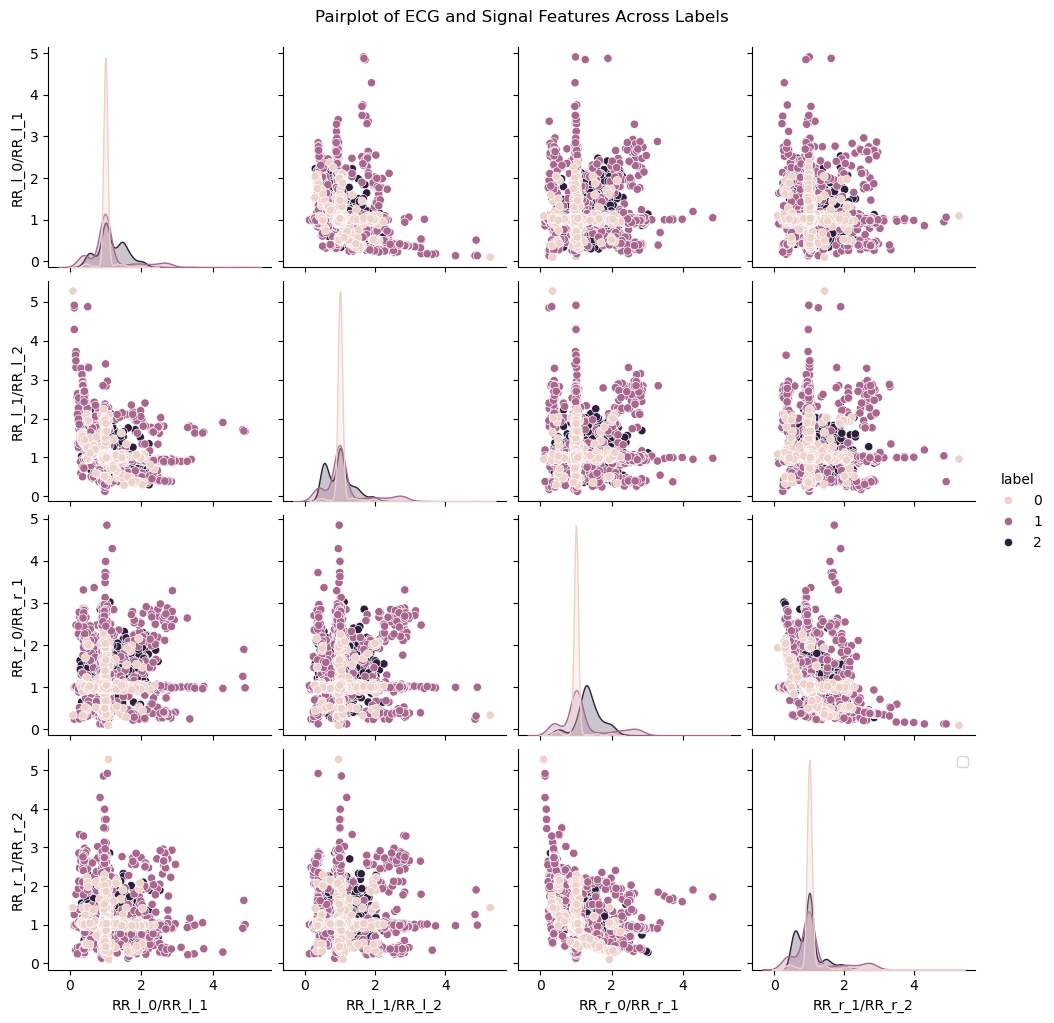

In [34]:
# Select the relevant columns for the analysis
columns = ['RR_l_0/RR_l_1', 'RR_l_1/RR_l_2', 'RR_r_0/RR_r_1', 'RR_r_1/RR_r_2', 'label']


# Sort the df so that label 0 points are plotted last (on top)
df_sorted = df.sort_values(by='label', ascending=False)

# Create a pairplot to visualize relationships across all specified columns
sns.pairplot(df_sorted[columns], hue='label', diag_kind='kde')
plt.suptitle('Pairplot of ECG and Signal Features Across Labels', y=1.02)
plt.legend()
plt.show()


C:\Users\edvar\AppData\Local\Temp\ipykernel_27308\2246323479.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


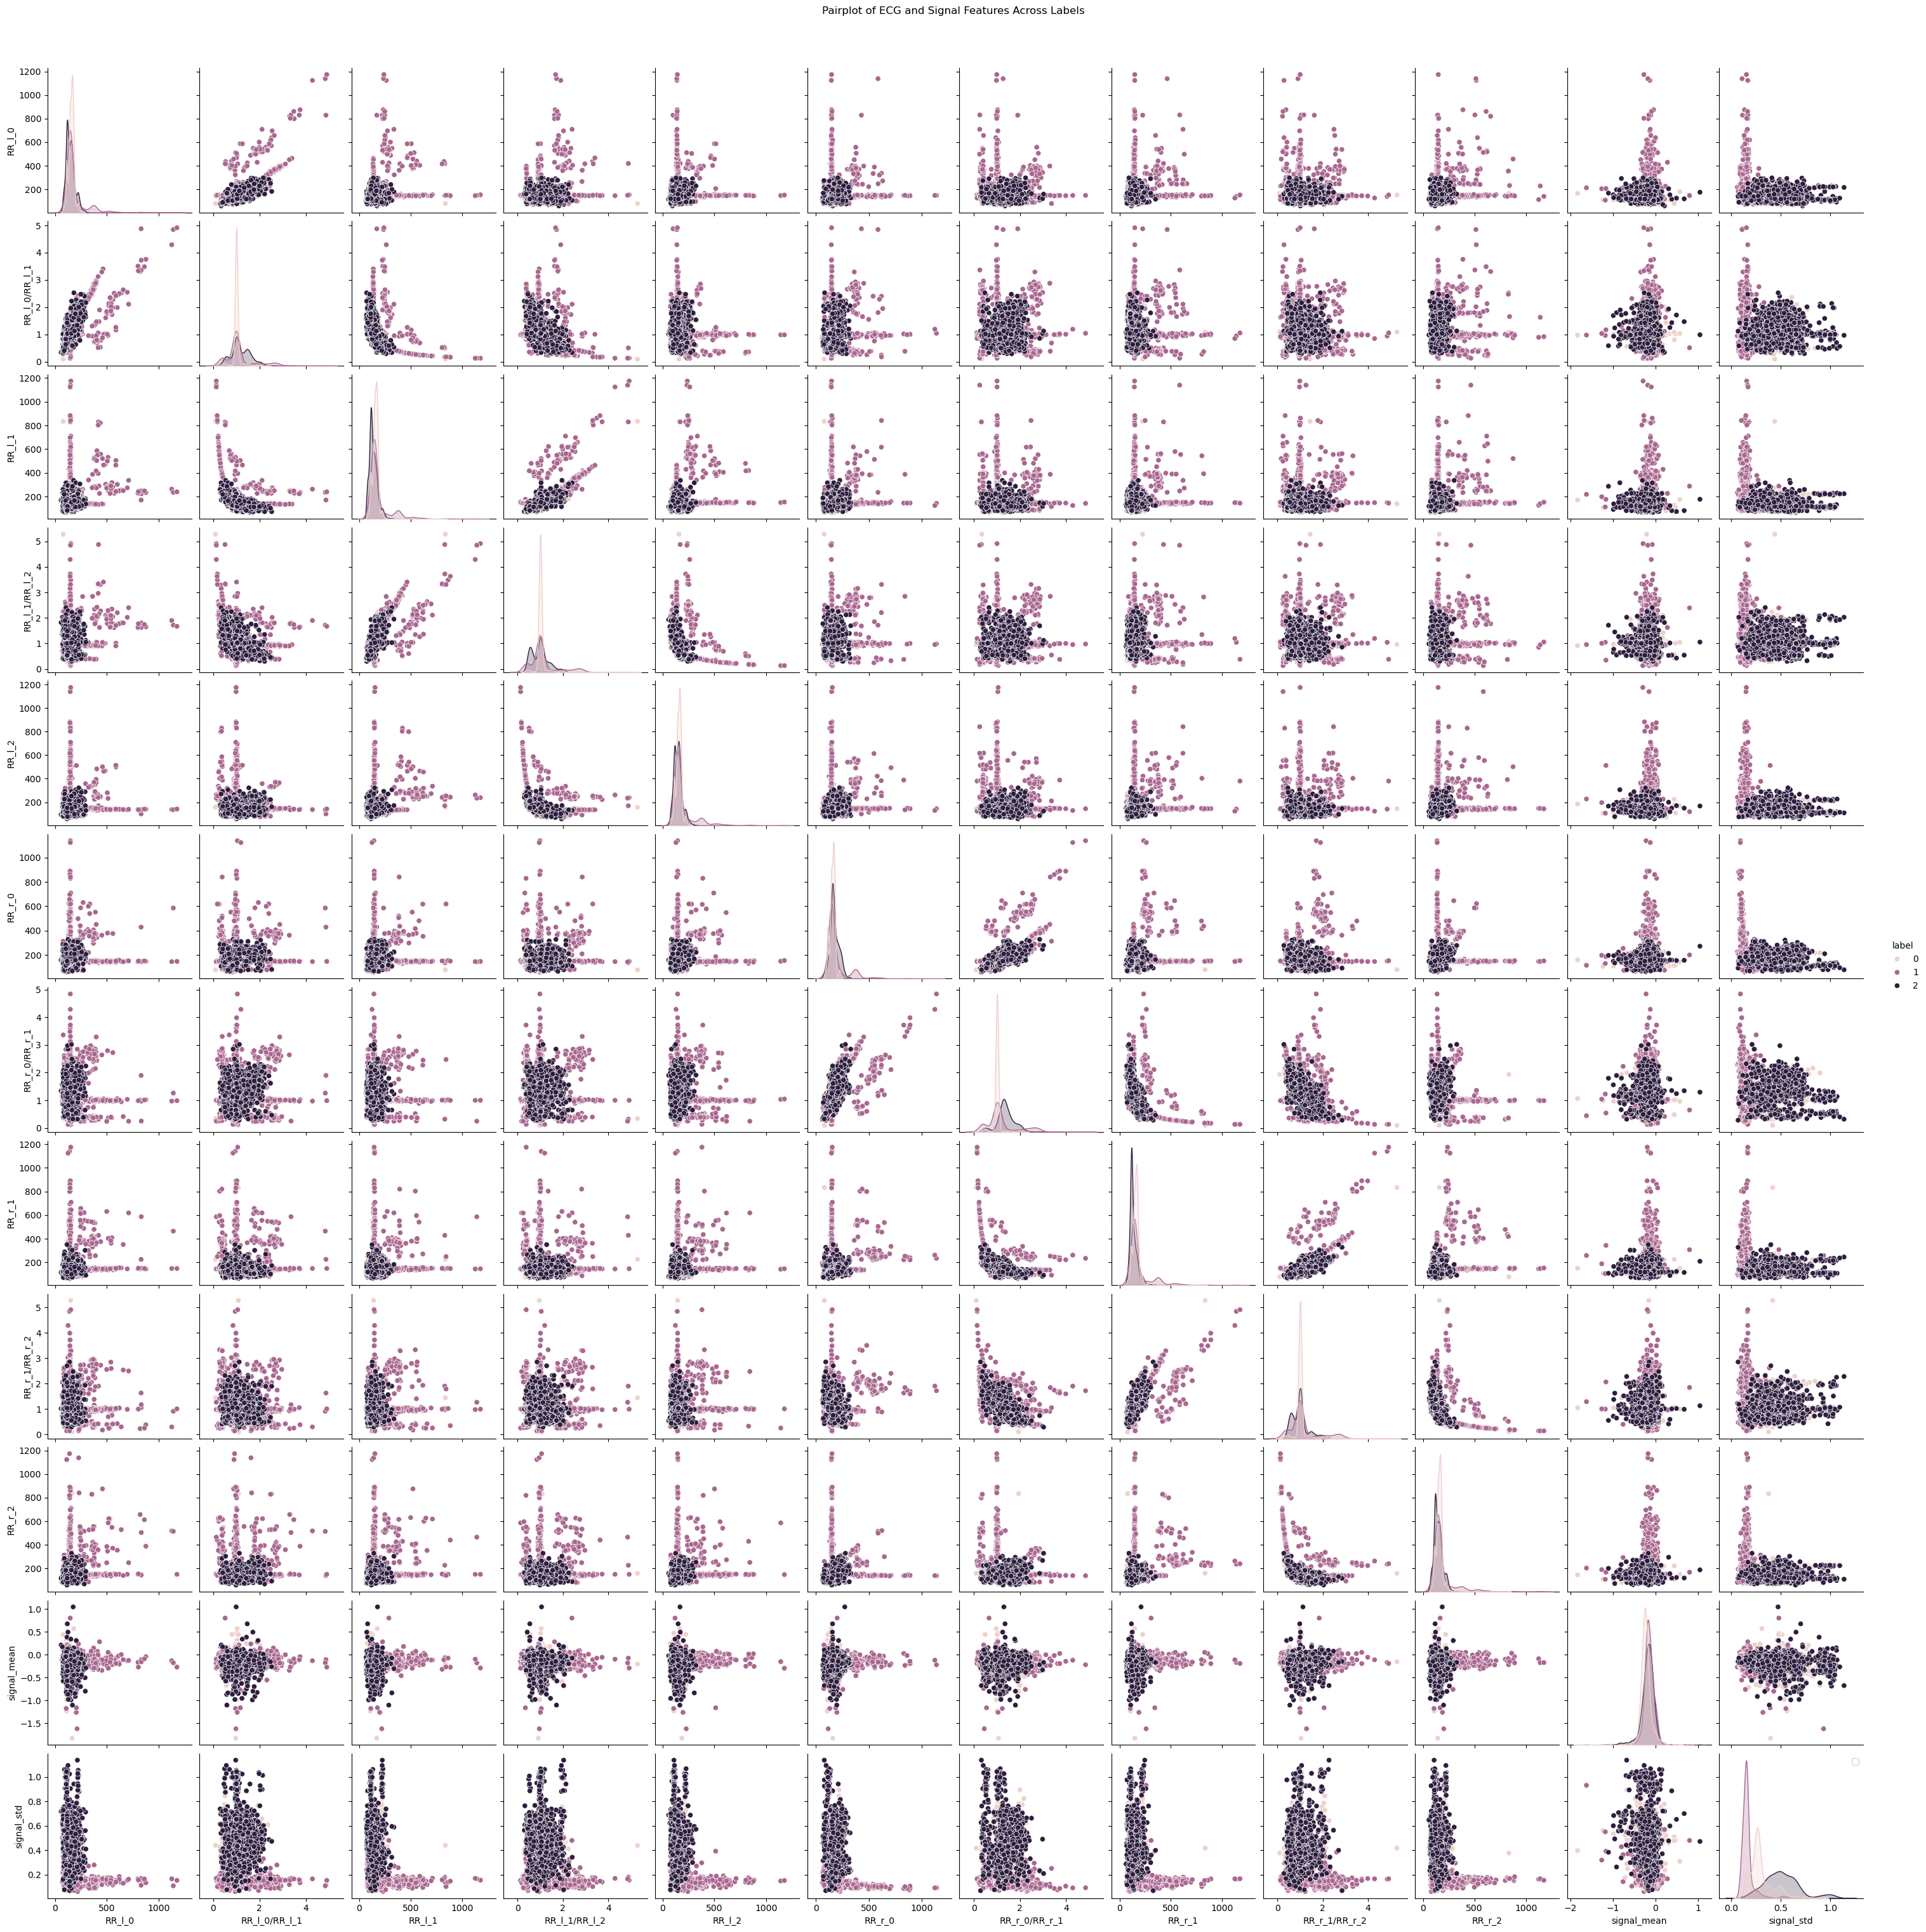

In [29]:
# Select the relevant columns for the analysis
columns = ['RR_l_0', 'RR_l_0/RR_l_1', 'RR_l_1', 'RR_l_1/RR_l_2', 'RR_l_2', 'RR_r_0',
       'RR_r_0/RR_r_1', 'RR_r_1', 'RR_r_1/RR_r_2', 'RR_r_2', 'signal_mean',
       'signal_std', 'label']

# Create a pairplot to visualize relationships across all specified columns
sns.pairplot(df[columns], hue='label', diag_kind='kde')
plt.suptitle('Pairplot of ECG and Signal Features Across Labels', y=1.02)
plt.legend()
plt.show()
